##  Regime Based Method

### use Fama-French model to present the return

In [1]:
import getFamaFrenchFactors as gff

In [2]:
ff3_monthly = gff.famaFrench3Factor(frequency='m')
ff3_monthly=ff3_monthly.loc[ff3_monthly['date_ff_factors']>"1990-01-31"]
ff3_monthly.set_index("date_ff_factors",inplace=True)
ff3_monthly

,Mkt-RF,SMB,HML,RF
date_ff_factors,,,,
1990-02-28,0.0111,0.0097,0.0064,0.0057
1990-03-31,0.0183,0.0146,-0.0292,0.0064
1990-04-30,-0.0336,-0.0045,-0.0259,0.0069
1990-05-31,0.0842,-0.0256,-0.0383,0.0068
1990-06-30,-0.0109,0.0136,-0.0193,0.0063
...,...,...,...,...
2022-02-28,-0.0229,0.0218,0.0309,0.0000
2022-03-31,0.0305,-0.0161,-0.0182,0.0001
2022-04-30,-0.0946,-0.0140,0.0616,0.0001


In [3]:
ff3_monthly['DATE']=ff3_monthly.index

In [4]:

ff3_train=ff3_monthly.loc[ff3_monthly['DATE']<"2009-01-01"]
ff3_test=ff3_monthly.loc[ff3_monthly['DATE']>"2009-01-01"]
del ff3_train['DATE']
del ff3_test['DATE']
ff3_train

,Mkt-RF,SMB,HML,RF
date_ff_factors,,,,
1990-02-28,0.0111,0.0097,0.0064,0.0057
1990-03-31,0.0183,0.0146,-0.0292,0.0064
1990-04-30,-0.0336,-0.0045,-0.0259,0.0069
1990-05-31,0.0842,-0.0256,-0.0383,0.0068
1990-06-30,-0.0109,0.0136,-0.0193,0.0063
...,...,...,...,...
2008-08-31,0.0153,0.0350,0.0148,0.0013
2008-09-30,-0.0924,-0.0124,0.0590,0.0015
2008-10-31,-0.1723,-0.0252,-0.0222,0.0008


#### Normal distribution test

In [5]:
#normal distribution test
from scipy import stats

In [6]:
def normal_test(name,data,p_threshold=1e-3):
    x=data[name]
    
    fig = plt.figure(figsize=(10,12))
    ax1 = fig.add_subplot(211)
    prob = stats.probplot(x, dist=stats.norm, plot=ax1)
    plt.xlabel('')
    plt.title('Probplot against normal distribution')
    plt.show()
    
    if len(x)>=8:
        k2, p = stats.normaltest(x)
        print("p = {:g}".format(p))
        if p < p_threshold:  # null hypothesis: x comes from a normal distribution
            print("The null hypothesis can be rejected")
            return False
        else:
            print("The null hypothesis cannot be rejected")
            return True
    else:
        print("the sample size is too small for nomaltest")
        return True

       
    
    

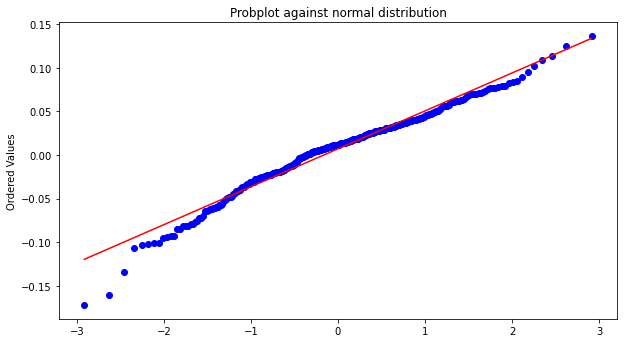

p = 6.77918e-08
The null hypothesis can be rejected


False

In [8]:
import matplotlib.pyplot as plt
normal_test("Mkt-RF",ff3_monthly)

### transform the data 

In [9]:
def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

In [ ]:
scale_dict={}
for i in ff3_monthly.columns:

    x=NormalizeData(ff3_monthly[i])+0.001
    xt, _ = stats.boxcox(x)
    scale_dict[i]=xt
    
transform_df=pd.DataFrame(scale_dict)
#transform_df.describe()

In [ ]:
transform_df.set_index(ff3_monthly.index,inplace=True)
transform_df['DATE']=ff3_monthly.index
transform_df

In [ ]:

ff3_train=transform_df.loc[transform_df['DATE']<"2009-01-01"]
ff3_test=transform_df.loc[transform_df['DATE']>"2009-01-01"]
del ff3_train['DATE']
del ff3_test['DATE']
ff3_train

In [ ]:
normal_test("Mkt-RF",transform_df)

#### only use Mkt-RF as factor

In [ ]:
df_train.index  = pd.to_datetime(df_train.index)

fig, ax = plt.subplots(figsize=(20, 12),nrows=4,ncols=3)

ax[0][0].plot(monthly_returns['LBUSTRUU Index'])
ax[0][0].set_title('LBUSTRUU')

ax[0][1].plot(monthly_returns['LMBITR Index'])
ax[0][1].set_title('LMBITR')

ax[0][2].plot(monthly_returns['HFRIFWI Index'])
ax[0][2].set_title('HFRIFWI')

ax[1][0].plot(monthly_returns['LG30TRUU Index'])
ax[1][0].set_title('LG30TRUU')

ax[1][1].plot(monthly_returns['S5CONS Index'])
ax[1][1].set_title('S5CONS')

ax[1][2].plot(monthly_returns['S5INDU Index'])
ax[1][2].set_title('S5INDU')

ax[2][0].plot(monthly_returns['RU20VATR Index'])
ax[2][0].set_title('RU20VATR')

ax[2][1].plot(monthly_returns['S5COND Index'])
ax[2][1].set_title('S5COND')

ax[2][2].plot(monthly_returns['RU20INTR Index'])
ax[2][2].set_title('RU20INTR')

ax[3][0].plot(monthly_returns['S5INFT Index'])
ax[3][0].set_title('S5INFT')

plt.show()

In [ ]:
#build and train the MSDR model
msdr_model = sm.tsa.MarkovRegression(endog=df_train['LBUSTRUU Index'], k_regimes=2,
    trend='c',exog=ff3_train['Mkt-RF'], switching_variance=True)
msdr_model_results = msdr_model.fit(iter=1000)

In [ ]:
print(msdr_model_results.summary())

In [ ]:
msdr_model_results.params

In [ ]:
df_r = pd.read_csv('JHDUSRGDPBR.csv', header=0, index_col=0, infer_datetime_format=True, parse_dates=['DATE'])
df_r['DATE']=df_r.index
df_r

In [ ]:
#df_r = pd.read_csv('C:\\Users\\12521\\Desktop\\JHDUSRGDPBR.csv', header=0, index_col=0, infer_datetime_format=True, parse_dates=['DATE'])
df_r=df_r.loc[df_r['DATE']>"1990-01-31"]
df_r_train=df_r.loc[df_r['DATE']<"2009-01-01"]
df_r_test=df_r.loc[df_r['DATE']>"2009-01-01"]
del df_r_train['DATE']
del df_r_test['DATE']
df_r_train

In [ ]:
df_r_test.head()

In [ ]:

figure, axes = plt.subplots(4,figsize=(12,16))

ax = axes[0]
ax.plot(df_train.index, df_train['LBUSTRUU Index'])
ax.set(title='return of LBUSTRUU')

ax = axes[1]
ax.plot(df_train.index, ff3_train['Mkt-RF'],color="red")
ax.set(title='excess market return')

ax = axes[2]
ax.plot(df_train.index, msdr_model_results.smoothed_marginal_probabilities[0])
ax.plot(df_r_train.index, df_r_train['JHDUSRGDPBR'],color="green")
ax.set(title='Smoothed probability of regime 0')
 
ax = axes[3]
ax.plot(df_train.index, msdr_model_results.smoothed_marginal_probabilities[1])

ax.set(title='Smoothed probability of regime 1')

 
plt.show()

In [ ]:
from datetime import timedelta
from dateutil.relativedelta import relativedelta

In [ ]:
prob = msdr_model_results.smoothed_marginal_probabilities
prob

In [ ]:
for i in range(len(ff3_test)):
    new = pd.Series({0:prob.iloc[-1,0]*msdr_model_results.params[0]+prob.iloc[-1,1]*msdr_model_results.params[1], 
                     1: prob.iloc[-1,1]*(1-msdr_model_results.params[1])+prob.iloc[-1,0]*(1-msdr_model_results.params[0])})
    new.name = prob.index[-1] +  relativedelta(months=1)
    prob = prob.append(new)

In [ ]:
prediction=prob[227:]
prediction.index = ff3_test.index
prediction

In [ ]:
regime0_return = prediction[0]*(msdr_model_results.params[2]+msdr_model_results.params[4]*ff3_test['Mkt-RF'])
regime1_return=prediction[1]*(msdr_model_results.params[3]+msdr_model_results.params[5]*ff3_test['Mkt-RF'])

regime_return = regime0_return+regime1_return
pre_return = regime_return.to_frame()
pre_return.columns = ["pred_return"]
pre_return

In [ ]:

def MSDR(asset_name,factor_name=["Mkt-RF"],num_of_regimes=2,show_sum=True):
    
    msdr_model = sm.tsa.MarkovRegression(endog=df_train[asset_name], k_regimes=num_of_regimes,
    trend='c',exog=ff3_train[factor_name], switching_variance=True)
    msdr_model_results = msdr_model.fit(iter=1000)
    
    if show_sum:
        print(msdr_model_results.summary())
    
    prob = msdr_model_results.smoothed_marginal_probabilities
    #print(msdr_model_results.params)
    #print(prob)
    for j in range(len(ff3_test)):
        new = pd.Series({0:prob.iloc[-1,0]*msdr_model_results.params[0]+prob.iloc[-1,1]*msdr_model_results.params[1], 
                         1: prob.iloc[-1,1]*(1-msdr_model_results.params[1])+prob.iloc[-1,0]*(1-msdr_model_results.params[0])})
        new.name = prob.index[-1] +  relativedelta(months=1)
        prob = prob.append(new)
    print(prob)
    
    prediction=prob[227:]
    
    prediction.index = ff3_test.index

    '''
    regime0_return = prediction[0]*(msdr_model_results.params[2]+msdr_model_results.params[4]*ff3_test['Mkt-RF'])
    regime1_return=prediction[1]*(msdr_model_results.params[3]+msdr_model_results.params[5]*ff3_test['Mkt-RF'])

    regime_return = regime0_return+regime1_return
    pre_return = regime_return.to_frame()
    pre_return.columns = ["pred_return"]
    print(pre_return)
    
    
#     mean_squared_error(df_test[asset_name], pre_return)
    #MSE.append(mean_squared_error(df_test[asset_name], pre_return))
    print(MSE)
    
    plt.title(asset_name)
    plt.plot(df_test[asset_name])
    plt.plot(pre_return, color='red')
    plt.show()
    '''
    figure, axes = plt.subplots(4,figsize=(12,16))

    ax = axes[0]
    ax.plot(df_train.index, df_train[asset_name])
    ax.set(title='return of '+asset_name)

    ax = axes[1]
    ax.plot(df_train.index, ff3_train[factor_name])
    ax.set(title=factor_name)

    ax = axes[2]
    ax.plot(df_train.index, msdr_model_results.smoothed_marginal_probabilities[0])
    #ax.plot(df_r_train.index, df_r_train['JHDUSRGDPBR'],color="green")
    ax.set(title='Smoothed probability of regime 0')

    ax = axes[3]
    ax.plot(df_train.index, msdr_model_results.smoothed_marginal_probabilities[1])

    ax.set(title='Smoothed probability of regime 1')


    plt.show()
    
    return prob,prediction,msdr_model_results

In [ ]:
MSE = []
def test_regime_normal_dist(asset,factor=["Mkt-RF"],show_summary=True):
   
    prob,pred,model_results=MSDR(asset,factor_name=factor,num_of_regimes=2,show_sum=show_summary)
    prob.set_index(monthly_returns.index,inplace=True)
    #print(factor)
    factor_RF=factor.copy()
    factor_RF.append("RF")
    #print("NEW_LIST",factor_RF)
    merge_ff_prob=pd.merge(prob,transform_df[factor],how="inner",left_index=True,right_index=True)
    regime_0=merge_ff_prob[prob[0]>prob[1]]
    regime_1=merge_ff_prob[prob[0]<prob[1]]
    print(asset)
    
    
    
    for i in factor:
        print(i)
        print("regime_0:")
        a=normal_test(i,regime_0)
        print("regime_1:")
        b=normal_test(i,regime_1)
        if a and b:
            factor_regime_val={}
            print("the factor is normally distributed in both regime_0 and regime 1, we are ready to calculate return")
            
            #get the regime based factor value
            factor_regime_val['regime_0']=regime_0[factor].mean().values
            factor_regime_val['regime_1']=regime_1[factor].mean().values
            print(factor_regime_val)
            
            #print(model_results.params)
            #print(pred)
            #calculate the return in different regime
            regime0_return = pred[0]*(model_results.params[2]+model_results.params[4]*factor_regime_val['regime_0'])
            #print(regime0_return)
            regime1_return=pred[1]*(model_results.params[3]+model_results.params[5]*factor_regime_val['regime_1'])
            regime_return = regime0_return+regime1_return
            pre_return = regime_return.to_frame()
            pre_return.columns = ["pred_return"]
            #print(pre_return)
            
            
            #print(pre_return_dict)
            
            plt.title(asset+" regime predicted return")
            plt.plot(df_test[asset])
            plt.plot(pre_return, color='red')
            plt.show()
            
            MSE.append(mean_squared_error(df_test[asset], pre_return))
            
    
    
            
       
    return pre_return


In [ ]:
df_train.index  = pd.to_datetime(df_train.index)
df_test.index  = pd.to_datetime(df_test.index)
pre_return_dict={}
for k in df_train.columns:
    
    pred=test_regime_normal_dist(k)
    pre_return_dict[k]=pred.values.squeeze()
pre_return_df=pd.DataFrame(pre_return_dict,index=df_test.index)        

In [ ]:
MSE

In [ ]:
MSE_RegimeFF1_Mkt = pd.DataFrame(MSE)
MSE_RegimeFF1_Mkt = pd.DataFrame(MSE_RegimeFF1_Mkt.T)
MSE_RegimeFF1_Mkt.columns = list(df_train.columns)
MSE_RegimeFF1_Mkt.index = ["MSE_RegimeFF1_Mkt"]
MSE_RegimeFF1_Mkt

In [ ]:
pre_return_df.plot()

In [ ]:
pre_return_df

#### only use SMB as factor

In [ ]:
MSE = []
for i in df_train.columns:
    MSDR(i,factor_name="SMB",num_of_regimes=2)
    test_regime_normal_dist(i,factor=["SMB"],show_summary=False)

In [ ]:
MSE_RegimeFF1_smb = pd.DataFrame(MSE)
MSE_RegimeFF1_smb = pd.DataFrame(MSE_RegimeFF1_smb.T)
MSE_RegimeFF1_smb.columns = list(df.columns)
MSE_RegimeFF1_smb.index = ["MSE_RegimeFF1_smb"]
MSE_RegimeFF1_smb

#### only use HML as factor

In [ ]:
fig = plt.figure(figsize=(12,4))
fig.suptitle('1990-2008: return of LBUSTRUU & excess market return ')
df_train['LBUSTRUU'].plot()
ff3_train['Mkt-RF'].plot(color="red")
plt.show()

In [ ]:
MSE = []
for i in df_train.columns:
     MSDR(i,factor_name="HML",num_of_regimes=2)
     test_regime_normal_dist(i,factor=["HML"],show_summary=False)

In [ ]:
MSE_RegimeFF1_hml = pd.DataFrame(MSE)
MSE_RegimeFF1_hml = pd.DataFrame(MSE_RegimeFF1_hml.T)
MSE_RegimeFF1_hml.columns = list(df.columns)
MSE_RegimeFF1_hml.index = ["MSE_RegimeFF1_hml"]
MSE_RegimeFF1_hml

#### Use all three factors

In [ ]:
MSE = []
for i in df_train.columns:
     MSDR(i,factor_name=["Mkt-RF","SMB","HML"],num_of_regimes=2)
     test_regime_normal_dist(i,factor=["Mkt-RF","SMB","HML"],show_summary=False)

In [ ]:
MSE_RegimeFF3 = pd.DataFrame(MSE)
MSE_RegimeFF3 = pd.DataFrame(MSE_RegimeFF3.T)
MSE_RegimeFF3.columns = list(df.columns)
MSE_RegimeFF3.index = ["MSE_RegimeFF3"]
MSE_RegimeFF3

# predict cov

## Covariance from sklearn.cov using historical return

In [ ]:
# Assume history represent the future, therefore, use training dataset
# source: https://scikit-learn.org/stable/modules/covariance.html 

### Maximum likelihood covariance estimator

In [ ]:
# pip install -U scikit-learn

In [ ]:
cov = EmpiricalCovariance().fit(df_train)
cov.covariance_ = pd.DataFrame(cov.covariance_)
cov.covariance_.columns = df_train.columns
cov.covariance_.index = df_train.columns
cov.covariance_

In [ ]:
labs = df_train.columns

sns.heatmap(cov.covariance_, annot=False, fmt='g', xticklabels=labs, yticklabels=labs)
plt.show()

### LedoitWolf Estimator

In [ ]:
cov = LedoitWolf().fit(df_train)
cov.covariance_ = pd.DataFrame(cov.covariance_)
cov.covariance_.columns = df_train.columns
cov.covariance_.index = df_train.columns
cov.covariance_

### Covariance estimator with shrinkage

In [ ]:
cov = ShrunkCovariance().fit(df_train)
cov.covariance_ = pd.DataFrame(cov.covariance_)
cov.covariance_.columns = df_train.columns
cov.covariance_.index = df_train.columns
cov.covariance_

### Minimum Covariance Determinant (MCD): robust estimator of covariance

In [ ]:
cov = MinCovDet(random_state=0).fit(df_train)
cov.covariance_ = pd.DataFrame(cov.covariance_)
cov.covariance_.columns = df_train.columns
cov.covariance_.index = df_train.columns
cov.covariance_

# Regime based mvo

### use the estimated result of regime-based

#### target return and minize risk

In [ ]:
regime_lw_min=My_MVO(pre_return_df,covariance_estimate_method="ledoit_wolf",constraints=0,optimize_method="Minimize risk")
print(regime_lw_min.annualized_expected_return())
print(regime_lw_min.estimate_covariance_matrix(True))
print(regime_lw_min.set_efficient_frontier())
print(regime_lw_min.mvo_opt_performance(my_return=0.2))

#### target volatility and maximize return

In [ ]:
regime_lw_max=My_MVO(pre_return_df,covariance_estimate_method="ledoit_wolf",constraints=0,optimize_method="Maximize return")
print(regime_lw_max.annualized_expected_return())
print(regime_lw_max.estimate_covariance_matrix(True))
print(regime_lw_max.set_efficient_frontier())
print(regime_lw_max.mvo_opt_performance(my_volatility=0.02))

#### target return and minimize risk, downside risk focused

In [ ]:
regime_semi_min=My_MVO(pre_return_df,covariance_estimate_method="semicovariance",constraints=constraint_dict,optimize_method="Minimize risk")
print(regime_semi_min.annualized_expected_return())
print(regime_semi_min.estimate_covariance_matrix(True))
print(regime_semi_min.set_efficient_frontier())
print(regime_semi_min.mvo_opt_performance(my_return=0.05))

#### target volatility and maximize return, downside risk focused

In [ ]:
regime_semi_max=My_MVO(pre_return_df,covariance_estimate_method="semicovariance",constraints=constraint_dict,optimize_method="Maximize return")
print(regime_semi_max.annualized_expected_return())
print(regime_semi_max.estimate_covariance_matrix(True))
print(regime_semi_max.set_efficient_frontier())
print(regime_semi_max.mvo_opt_performance(my_return=0.05))

In [ ]:
sector_mapper = {
    'LBUSTRUU Index':"lower_risk",
    'LMBITR Index':"lower_risk",
    'HFRIFWI Index':"lower_risk",
    'LG30TRUU Index':"lower_risk",
    'S5INDU Index':"lower_risk",
    "S5CONS Index":"high_risk",
    "RU20VATR Index":"high_risk",
    "S5COND Index":"high_risk",
    "RU20INTR Index":"high_risk",
    "S5INFT Index":"high_risk"}

sector_lower = {
    "lower_risk": 0.35, # at least 35% 
}

sector_upper = {
    "lower_risk":0.45
}

my_constraint_dict={"sector_mapper":sector_mapper,"sector_lower":sector_lower,"sector_upper":sector_upper}

# Thershold rebalance

In [ ]:
def compute_position(current_weight,fund,df_price):
    return pd.DataFrame(current_weight*fund/df_price)

In [ ]:
initial_position=compute_position(my_weight,fund,df_history_price.iloc[-1,:])
initial_position

# Fixed time

In [ ]:
five_years = weights
five_years


In [ ]:
five_years.set_axis(['LBUSTRUU Index', 'LMBITR Index', 'HFRIFWI Index','LG30TRUU Index',
                         'S5CONS Index','S5INDU Index','RU20VATR Index','S5COND Index',
                         'RU20INTR Index','S5INFT Index'], axis='columns', inplace=True)
total_5yearsreturn = df_test.mul(five_years)
total_5yearsreturn

In [ ]:
yearly = weights
yearly.set_axis(['LBUSTRUU Index', 'LMBITR Index', 'HFRIFWI Index','LG30TRUU Index',
                         'S5CONS Index','S5INDU Index','RU20VATR Index','S5COND Index',
                         'RU20INTR Index','S5INFT Index'], axis='columns', inplace=True)
total_yearlyreturn = df_test.mul(yearly)
total_yearlyreturn

In [ ]:
five_years.set_axis(['LBUSTRUU Index', 'LMBITR Index', 'HFRIFWI Index','LG30TRUU Index',
                         'S5CONS Index','S5INDU Index','RU20VATR Index','S5COND Index',
                         'RU20INTR Index','S5INFT Index'], axis='columns', inplace=True)
total_5yearsreturn = df_test.mul(five_years)
total_5yearsreturn